In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [5]:
train = df[:split_count].copy()
train.shape

(614, 9)

In [6]:
test = df[split_count:].copy()
test.shape

(154, 9)

In [7]:
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [8]:
label_name = train.columns[-1]
label_name

'Outcome'

In [9]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [10]:
y_train = train[label_name]
print(y_train.shape)
y_train.head() #vector

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
614           11      138             74             26      144  36.1   
615            3      106             72              0        0  25.8   
616            6      117             96              0        0  28.7   
617            2       68             62             13       15  20.1   
618            9      112             82             24        0  28.2   

     DiabetesPedigreeFunction  Age  
614                     0.557   50  
615                     0.207   27  
616                     0.157   30  
617                     0.257   23  
618                     1.282   50

In [12]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_predict = model.predict(X_test) # prediction
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [16]:
X_test[:5]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
614           11      138             74             26      144  36.1   
615            3      106             72              0        0  25.8   
616            6      117             96              0        0  28.7   
617            2       68             62             13       15  20.1   
618            9      112             82             24        0  28.2   

     DiabetesPedigreeFunction  Age  
614                     0.557   50  
615                     0.207   27  
616                     0.157   30  
617                     0.257   23  
618                     1.282   50

[Text(191.07298192771083, 211.04470588235293, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(64.08596385542168, 198.25411764705882, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(12.907951807228915, 185.4635294117647, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(6.453975903614458, 172.6729411764706, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(3.226987951807229, 159.88235294117646, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(9.680963855421687, 159.88235294117646, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(6.453975903614458, 147.09176470588235, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.907951807228915, 147.09176470588235, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(19.361927710843375, 172.6729411764706, 'BMI <= 9.8\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(16.134939759036143, 

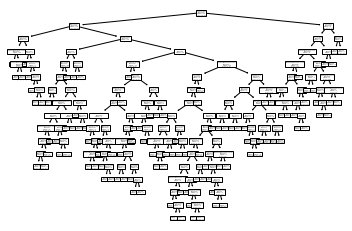

In [17]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

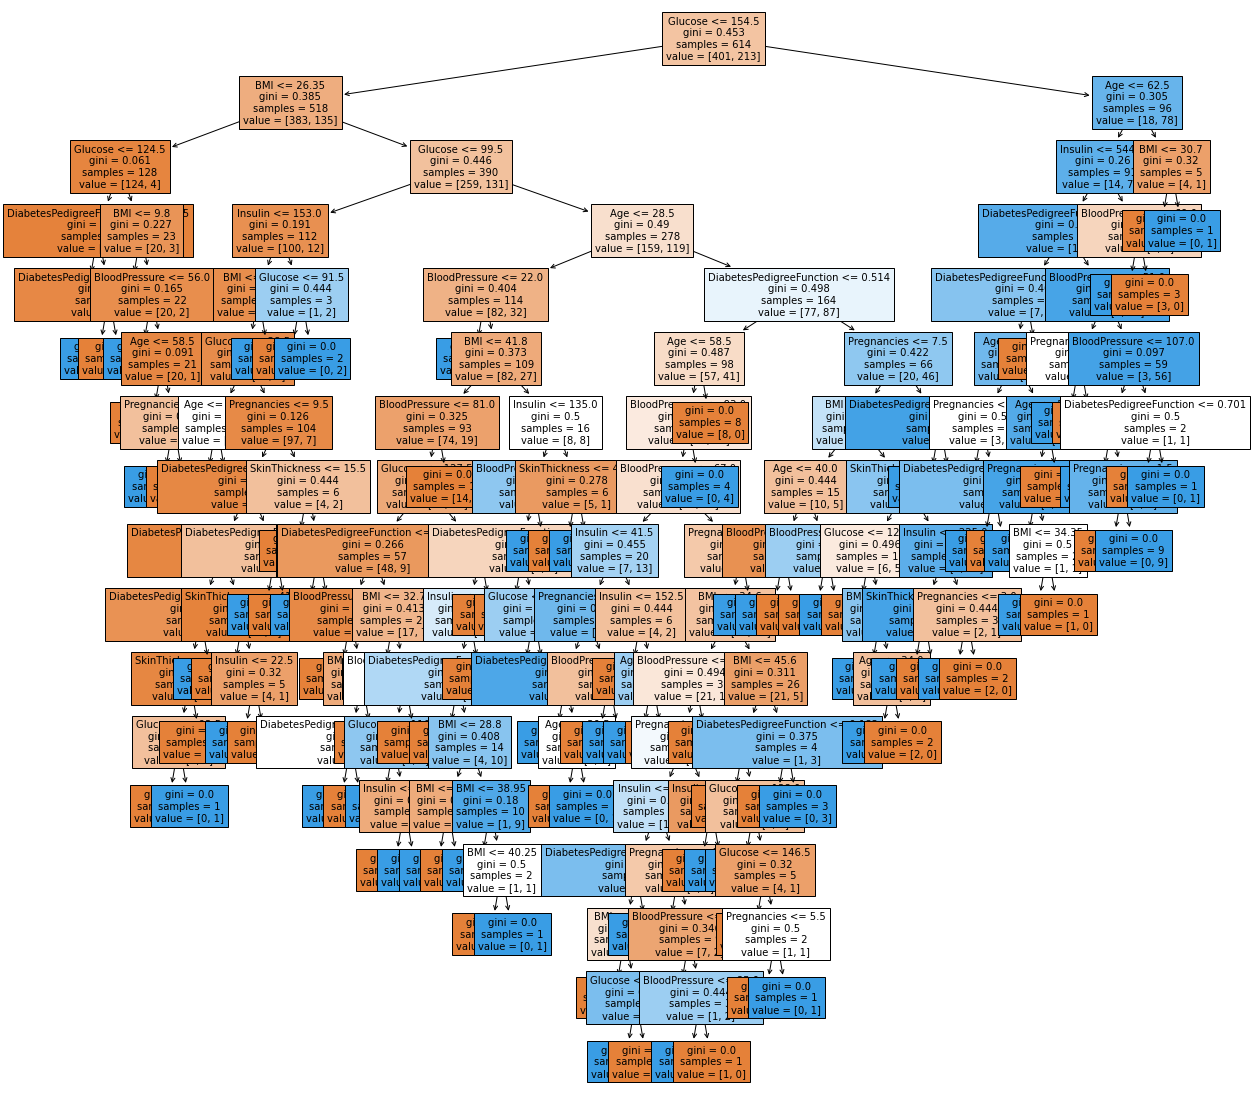

In [18]:
from sklearn.tree import plot_tree

#### Tree Visulization
plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names,
                           filled=True, 
                           fontsize=10)

In [19]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names, filled=True)


In [20]:
model.feature_importances_

array([0.07865851, 0.3091844 , 0.12250985, 0.02894541, 0.07383199,
       0.16899602, 0.11939881, 0.09847501])

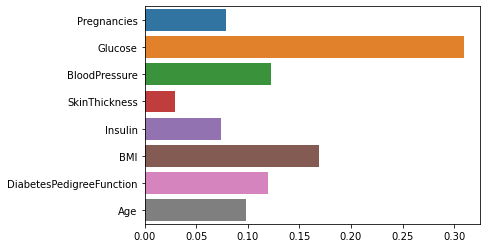

In [21]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [22]:
diff_count = abs(y_test - y_predict).sum()
diff_count

44

In [23]:
abs(y_test - y_predict).sum() / len(y_test)

0.2857142857142857

In [24]:
(len(y_test) - diff_count) / len(y_test) * 100 # 71% accuracy

71.42857142857143

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)


0.7142857142857143

In [26]:
model.score(X_test, y_test) * 100

71.42857142857143

In [27]:
df_null = df.isnull()
df_null.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0        False    False          False          False    False  False   
1        False    False          False          False    False  False   
2        False    False          False          False    False  False   
3        False    False          False          False    False  False   
4        False    False          False          False    False  False   

   DiabetesPedigreeFunction    Age  Outcome  
0                     False  False    False  
1                     False  False    False  
2                     False  False    False  
3                     False  False    False  
4                     False  False    False

In [28]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [30]:
feature_columns = df.columns[0:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [31]:
cols = feature_columns[1:]
cols


['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [32]:
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

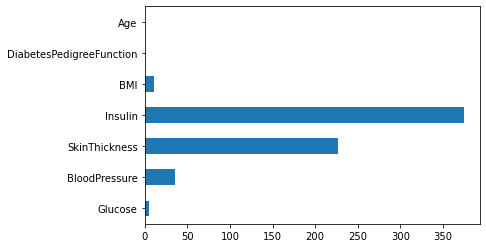

In [33]:
df_null.sum().plot.barh()

In [34]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

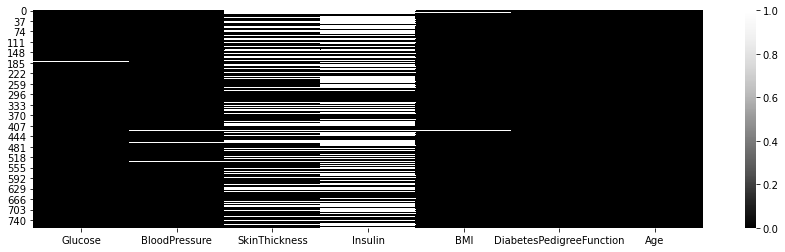

In [35]:
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")

In [36]:
df["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [37]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [38]:
df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [39]:
df.groupby(["Pregnancies"])["Outcome"].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [40]:
df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"])

mean  count
Pregnancies                 
0            0.342342    111
1            0.214815    135
2            0.184466    103
3            0.360000     75
4            0.338235     68
5            0.368421     57
6            0.320000     50
7            0.555556     45
8            0.578947     38
9            0.642857     28
10           0.416667     24
11           0.636364     11
12           0.444444      9
13           0.500000     10
14           1.000000      2
15           1.000000      1
17           1.000000      1

In [41]:
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
df_po

Pregnancies      mean  count
0             0  0.342342    111
1             1  0.214815    135
2             2  0.184466    103
3             3  0.360000     75
4             4  0.338235     68
5             5  0.368421     57
6             6  0.320000     50
7             7  0.555556     45
8             8  0.578947     38
9             9  0.642857     28
10           10  0.416667     24
11           11  0.636364     11
12           12  0.444444      9
13           13  0.500000     10
14           14  1.000000      2
15           15  1.000000      1
16           17  1.000000      1

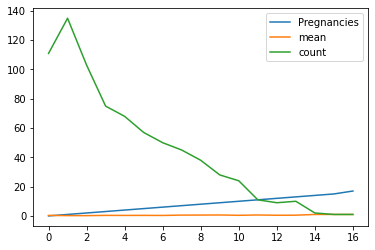

In [42]:
df_po.plot()

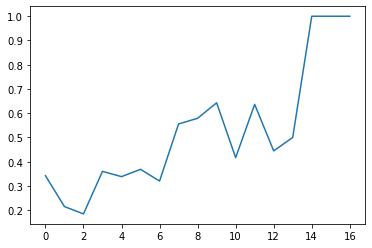

In [43]:
df_po["mean"].plot()

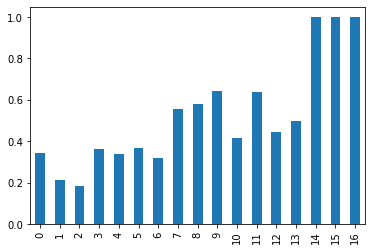

In [44]:
df_po["mean"].plot.bar()

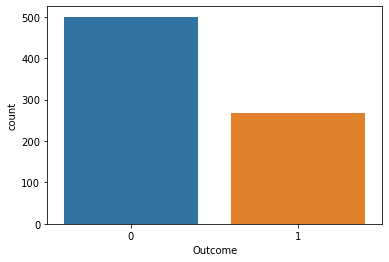

In [45]:
sns.countplot(data=df, x="Outcome")

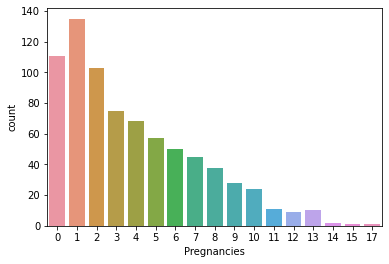

In [46]:
sns.countplot(data=df, x="Pregnancies")

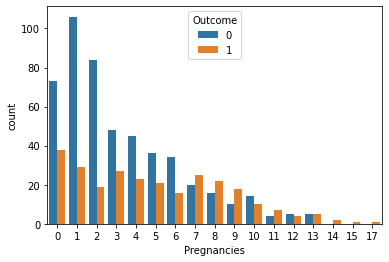

In [47]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

In [48]:
df["Pregnancies_high"] = df["Pregnancies"] > 6 #pregnancies high range
df[["Pregnancies", "Pregnancies_high"]].head()

Pregnancies  Pregnancies_high
0            6             False
1            1             False
2            8              True
3            1             False
4            0             False

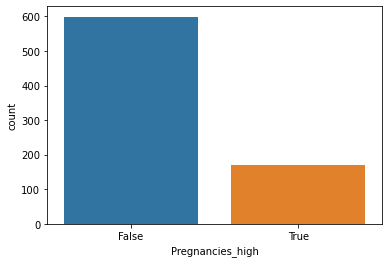

In [49]:
sns.countplot(data=df, x="Pregnancies_high")

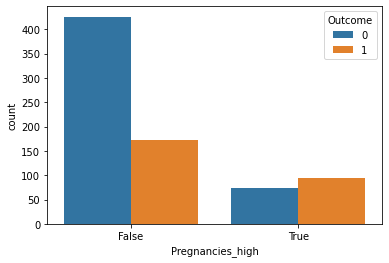

In [50]:
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

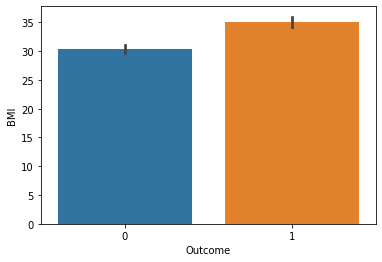

In [51]:
sns.barplot(data=df, x="Outcome", y="BMI")

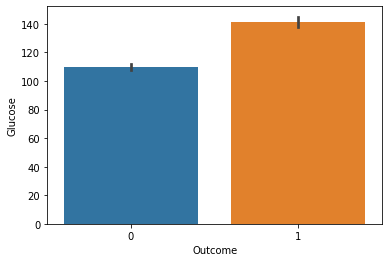

In [52]:
sns.barplot(data=df, x="Outcome", y="Glucose")

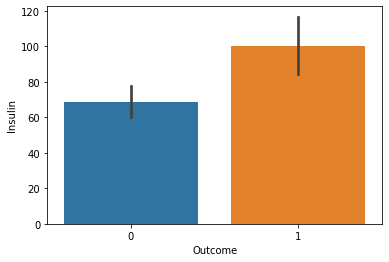

In [53]:
sns.barplot(data=df, x="Outcome", y="Insulin")

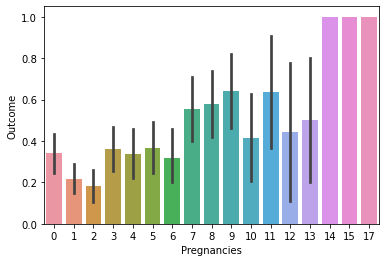

In [54]:
sns.barplot(data=df, x="Pregnancies", y="Outcome")

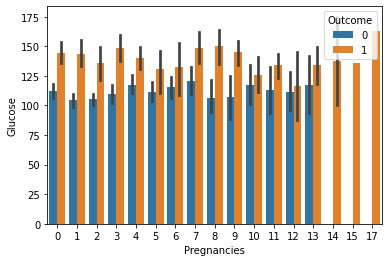

In [55]:
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")


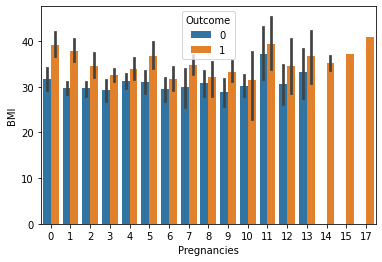

In [56]:
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")


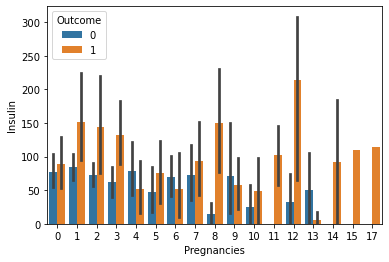

In [57]:
sns.barplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")


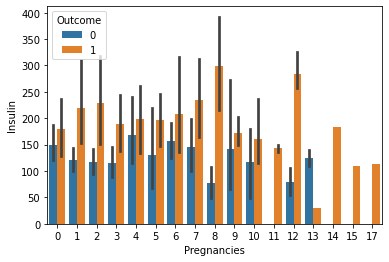

In [58]:
sns.barplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")


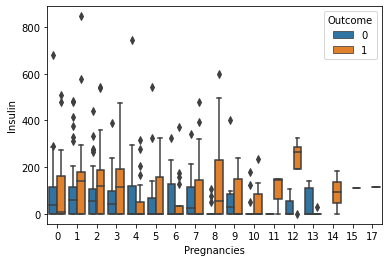

In [59]:
sns.boxplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")


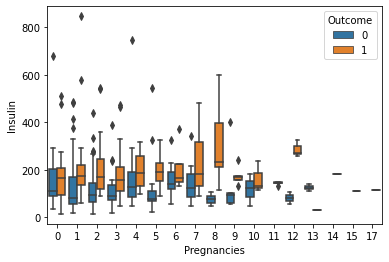

In [60]:
sns.boxplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")


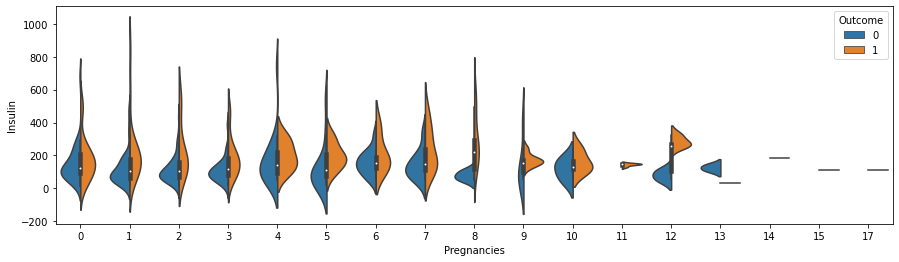

In [61]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome", split=True)

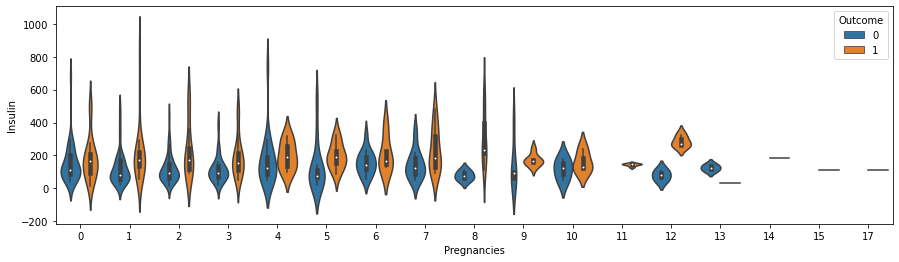

In [62]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

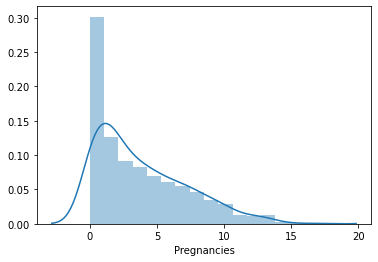

In [63]:
sns.distplot(df["Pregnancies"])

In [64]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

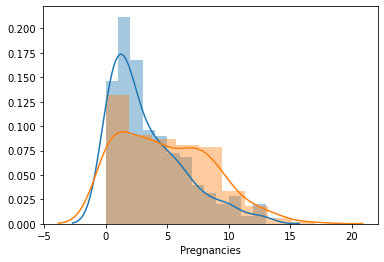

In [65]:
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

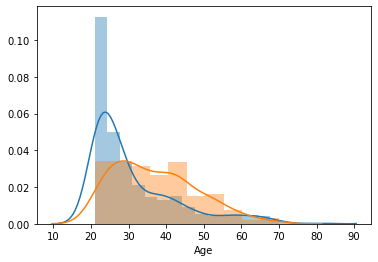

In [66]:
sns.distplot(df_0["Age"])
sns.distplot(df_1["Age"])

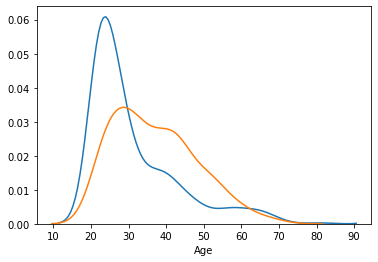

In [67]:
sns.distplot(df_0["Age"], hist=False)
sns.distplot(df_1["Age"], hist=False)

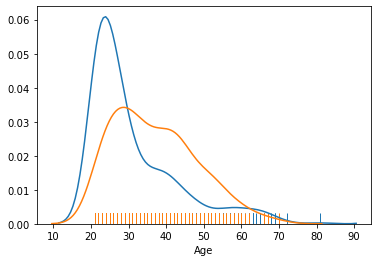

In [68]:
sns.distplot(df_0["Age"], hist=False, rug=True)
sns.distplot(df_1["Age"], hist=False, rug=True)

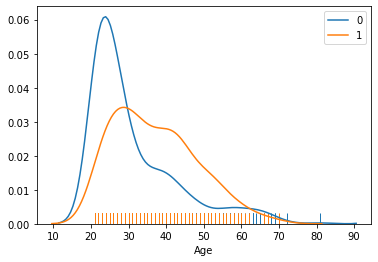

In [69]:
sns.distplot(df_0["Age"], hist=False, rug=True, label=0)
sns.distplot(df_1["Age"], hist=False, rug=True, label=1)

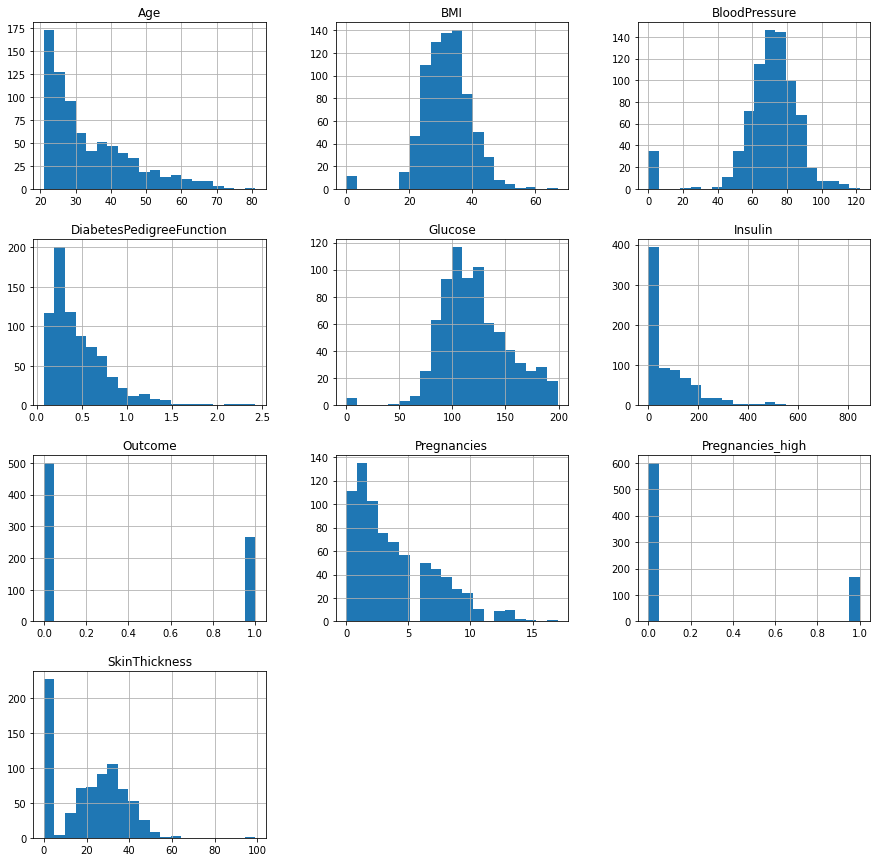

In [70]:
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15, 15), bins=20)

In [71]:
col_num = df.columns.shape
col_num

(10,)

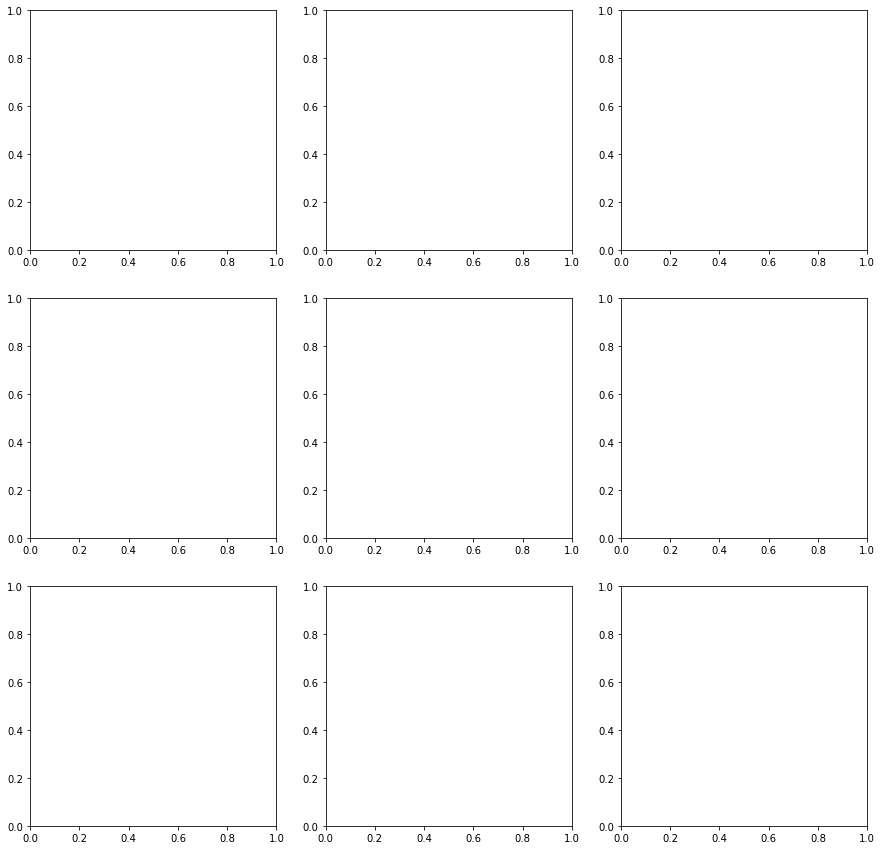

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

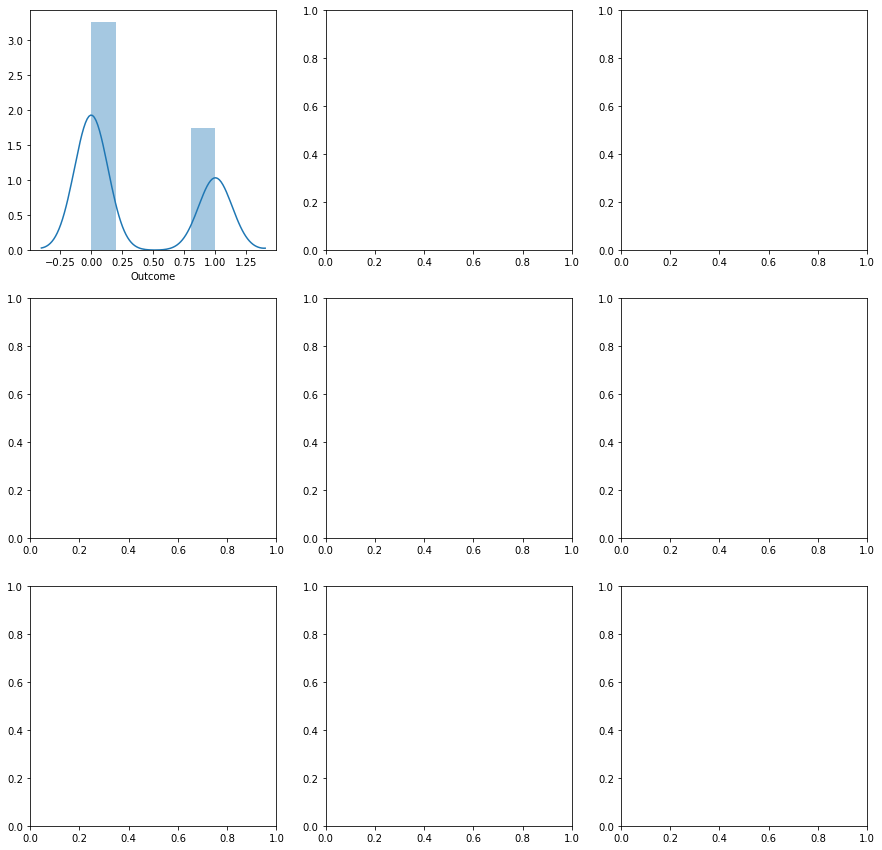

In [73]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

sns.distplot(df["Outcome"], ax=axes[0][0])

0
1
2
3
4
5
6
7
8


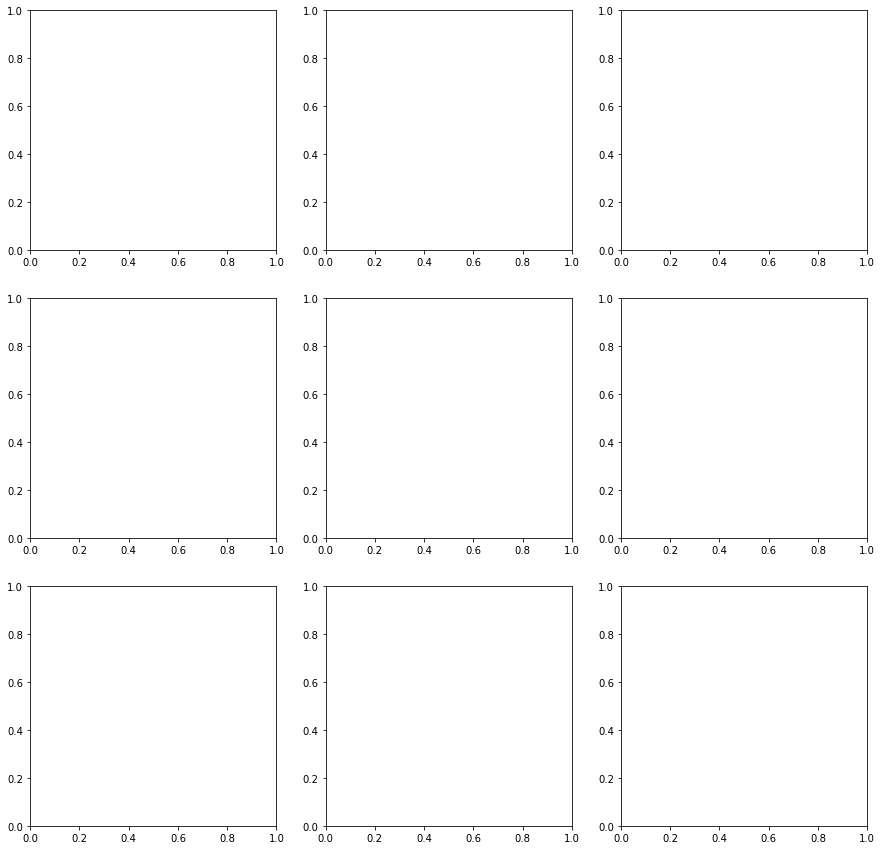

In [74]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(9):
    print(i)

In [75]:
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

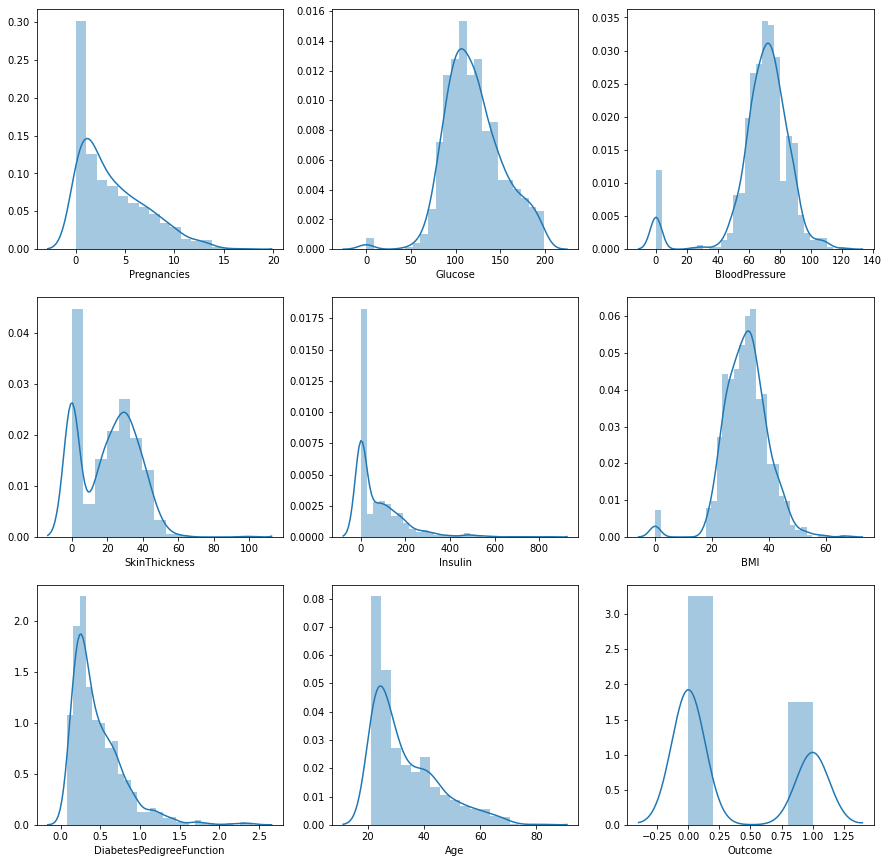

In [76]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.distplot(df[col_name], ax=axes[row][col])

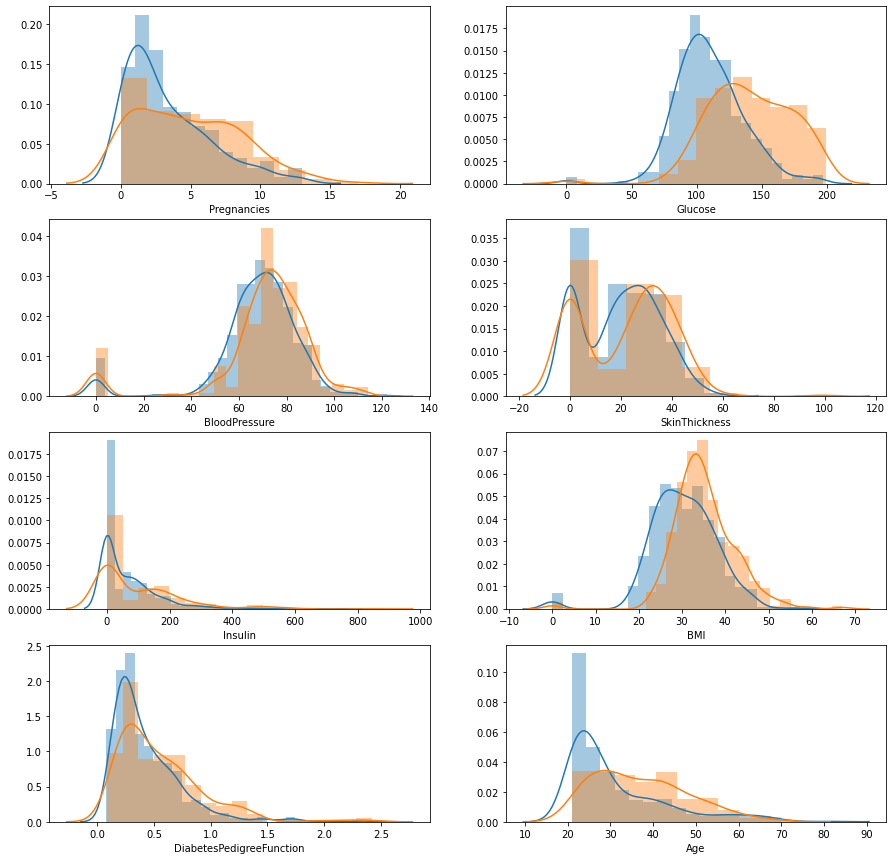

In [77]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2 
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

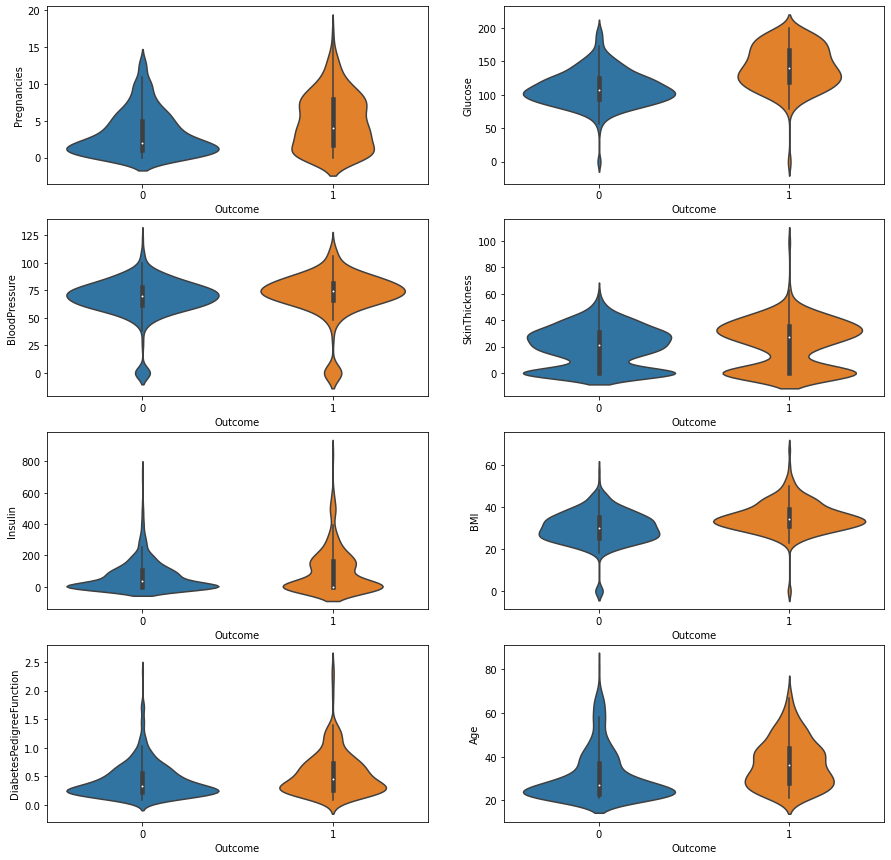

In [78]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col])

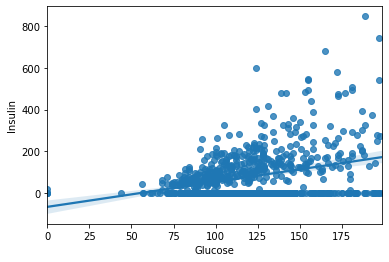

In [79]:
sns.regplot(data=df, x="Glucose", y="Insulin")

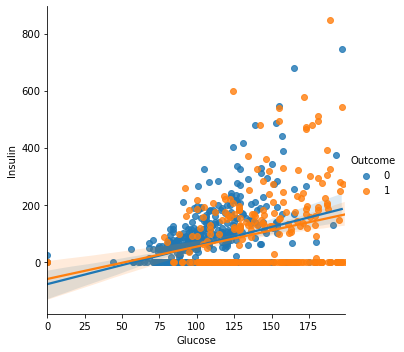

In [80]:
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

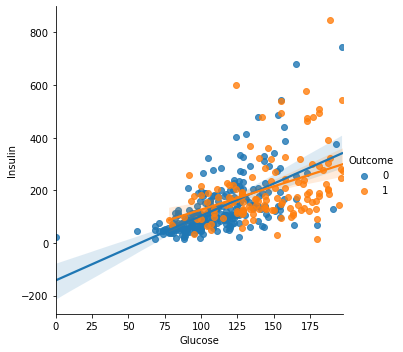

In [81]:
sns.lmplot(data=df[df["Insulin"] > 0], x="Glucose", y="Insulin", hue="Outcome")

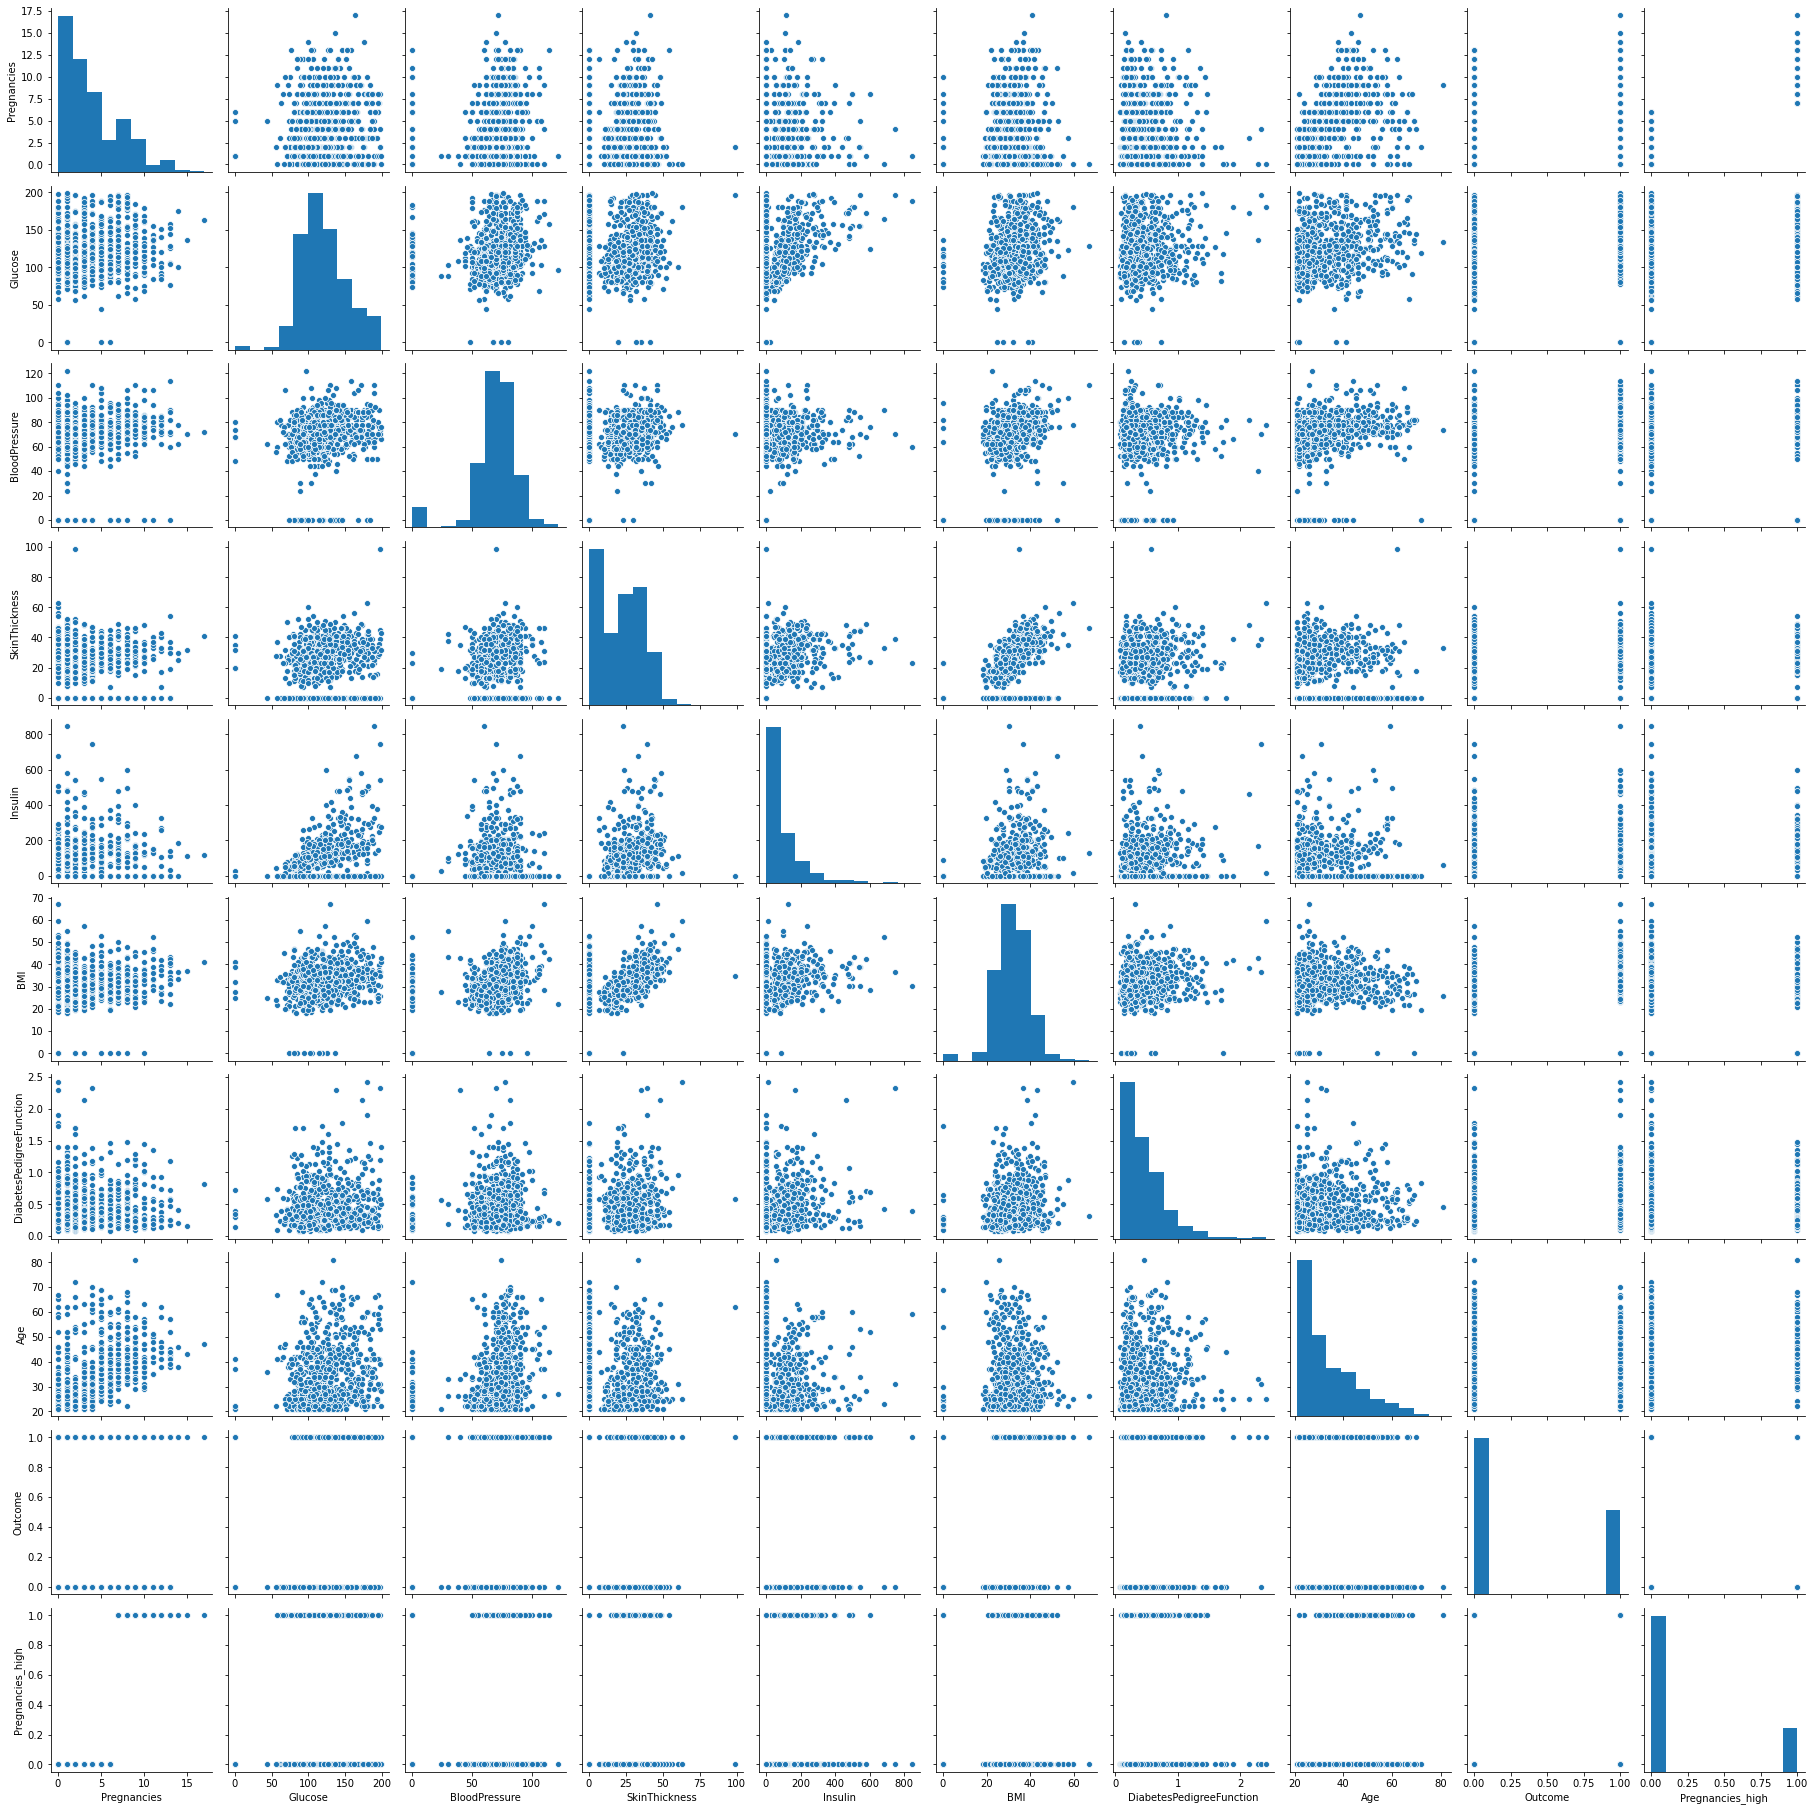

In [82]:
sns.pairplot(df)

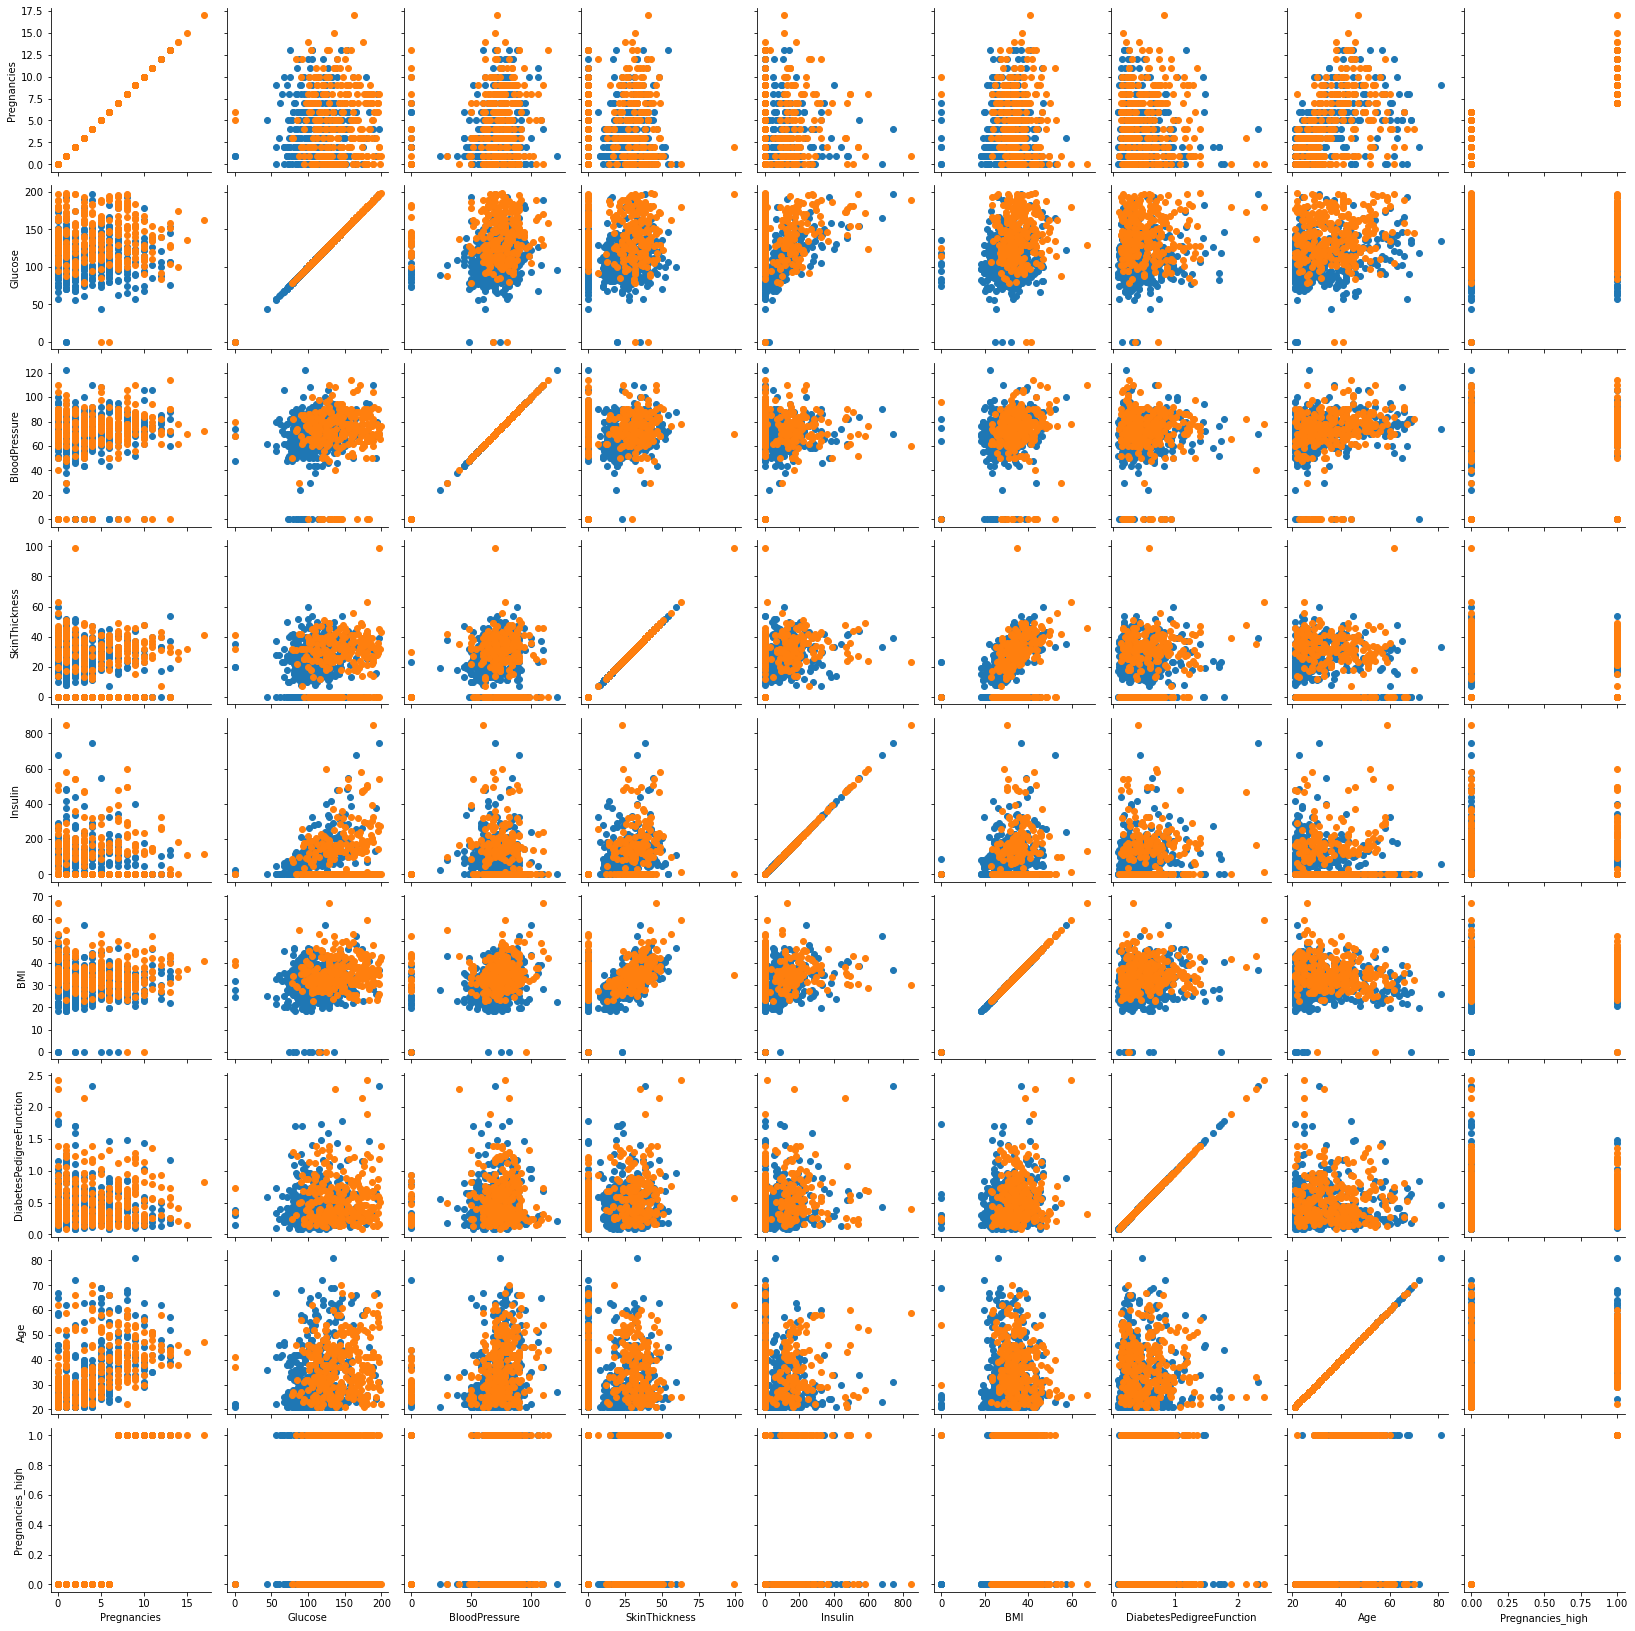

In [83]:
g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

In [84]:
df_corr = df.corr()
df_corr.style.background_gradient()

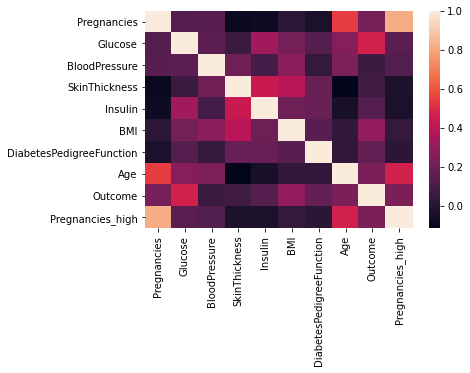

In [85]:
sns.heatmap(df_corr)

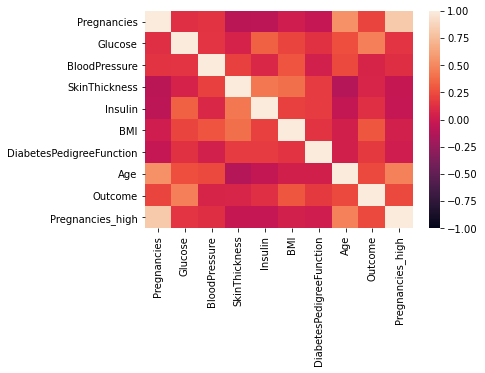

In [86]:
sns.heatmap(df_corr, vmax=1, vmin=-1) # limit max/min

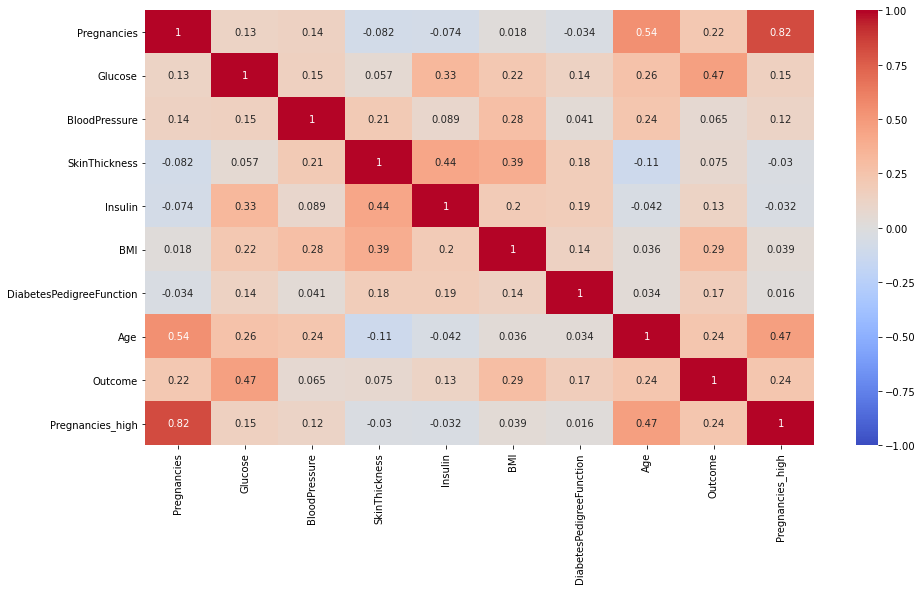

In [87]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [88]:
df.iloc[:, :-2].replace(0, np.nan)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      NaN  33.6   
1            1.0     85.0           66.0           29.0      NaN  26.6   
2            8.0    183.0           64.0            NaN      NaN  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            NaN    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      NaN  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            NaN      NaN  30.1   
767          1.0     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [89]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [90]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [91]:
df_corr["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Pregnancies_high            0.237557
Name: Outcome, dtype: float64

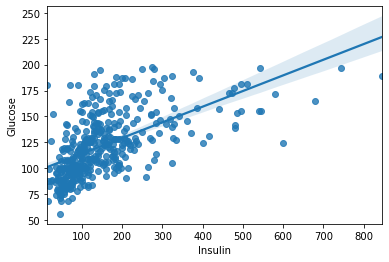

In [92]:
sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

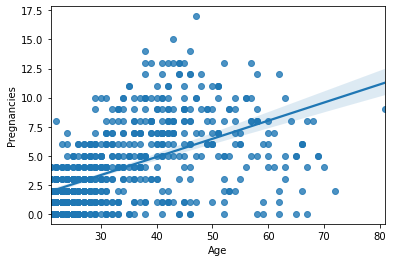

In [93]:
sns.regplot(data=df, x="Age", y="Pregnancies")

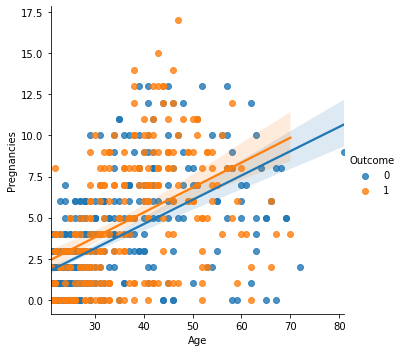

In [94]:
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome")

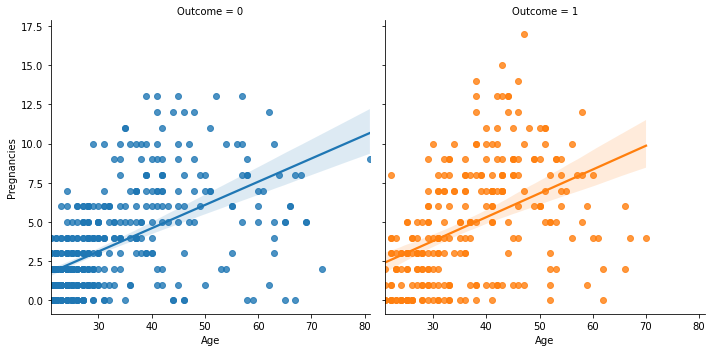

In [95]:
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")

In [96]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

Pregnancies  Pregnancies_high
0            6             False
1            1             False
2            8              True
3            1             False
4            0             False

In [97]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Pregnancies_high  
0                     0.627   50        1             False  
1                     0.351   31        0             False  
2                     0.672   32        1              True  
3                     0.167   21        0             False  
4                     2.288   33        1             False

In [98]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

Pregnancies  Pregnancies_high
0            6             False
1            1             False
2            8              True
3            1             False
4            0             False

In [99]:
feature_names = df.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high']

In [100]:
label_name = 'Outcome'
label_name

'Outcome'

In [101]:
train = df[:split_count].copy()
train.shape

(614, 10)

In [102]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             72             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3       89             66             23       94  28.1   
4      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Pregnancies_high  
0                     0.627   50             False  
1                     0.351   31             False  
2                     0.672   32              True  
3                     0.167   21             False  
4                     2.288   33             False

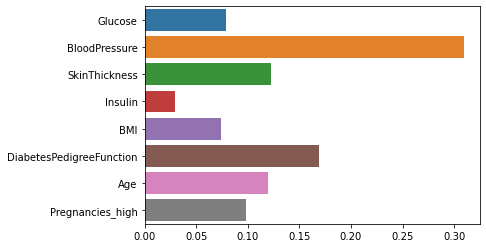

In [103]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [104]:
# one-hot-encoding

df["Age_low"] = df["Age"] < 25
df["Age_middle"] = (df["Age"] >= 25) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

Age  Age_low  Age_middle  Age_high
0   50    False        True     False
1   31    False        True     False
2   32    False        True     False
3   21     True       False     False
4   33    False        True     False

In [105]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [106]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head()

Insulin  Insulin_nan
0        0          NaN
1        0          NaN
2        0          NaN
3       94         94.0
4      168        168.0

In [107]:
df["Insulin_nan"].isnull().sum()

374

In [108]:
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [109]:
df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])

<ipython-input-109-bea675cdc2dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [110]:
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 68.7
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 100.3

In [111]:
### Training

model = DecisionTreeClassifier()
train = df[:split_count].copy()
test = df[split_count:].copy()
X_train = train[feature_names]
X_test = test[feature_names]
y_train = train[label_name]
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

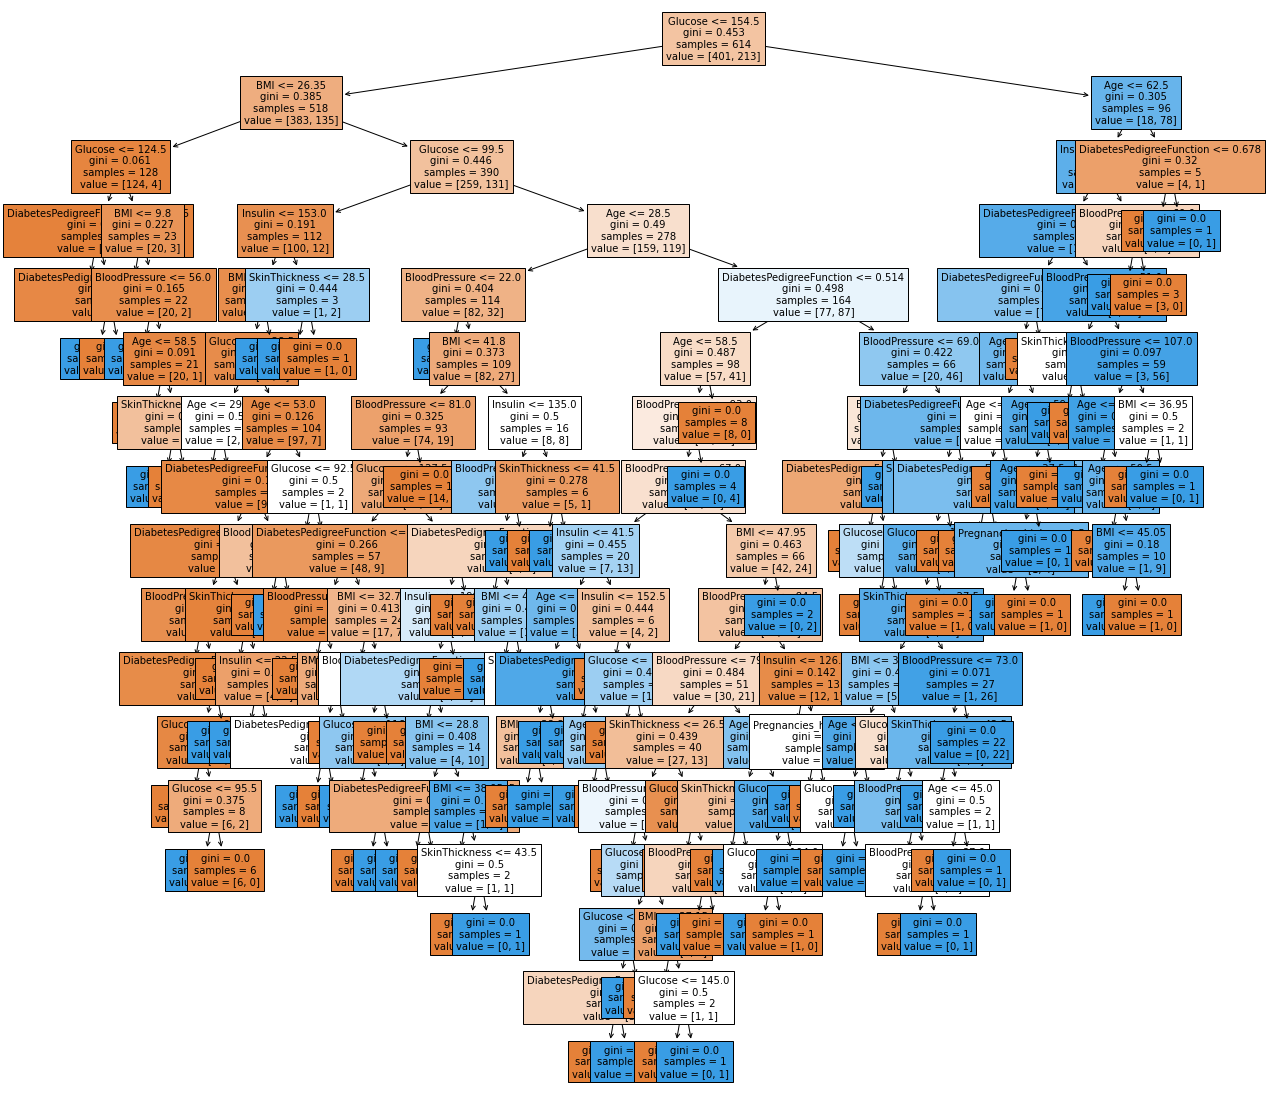

In [112]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

In [113]:
model.feature_importances_

array([0.35289362, 0.1448653 , 0.05595734, 0.04693121, 0.15992345,
       0.11920734, 0.11087655, 0.00934518])

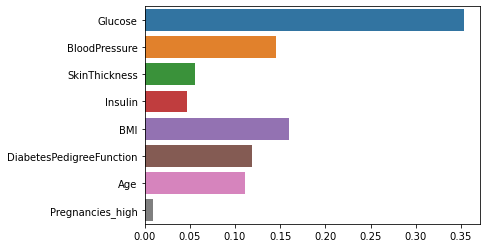

In [114]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [115]:
diff_count = abs(y_test - y_predict).sum()
diff_count

39

In [116]:
(len(y_test) - diff_count) / len(y_test) * 100


74.67532467532467

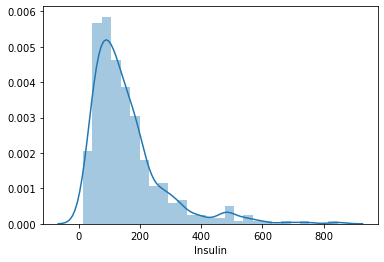

In [117]:
sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])


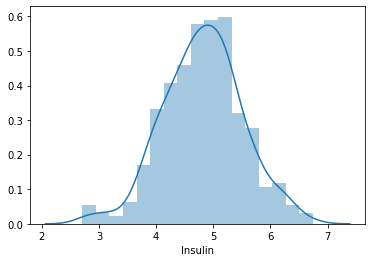

In [118]:
sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))


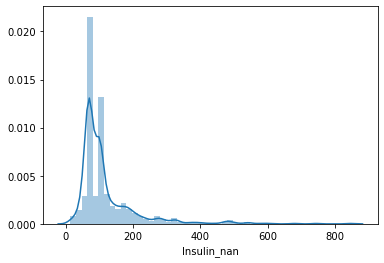

In [119]:
sns.distplot(df["Insulin_nan"])


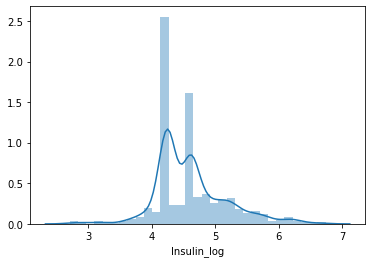

In [120]:
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.distplot(df["Insulin_log"])

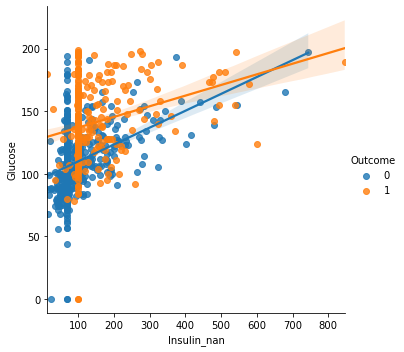

In [121]:
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue="Outcome")


In [122]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [123]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin  False  True 
Outcome                      
0                  332    168
1                  255     13

In [131]:
feature_names = df.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Age_low',
 'Age_middle',
 'Age_high',
 'Insulin_nan',
 'Insulin_log',
 'low_glu_insulin']

In [132]:
### Training

model = DecisionTreeClassifier()
train = df[:split_count].copy()
test = df[split_count:].copy()
X_train = train[feature_names]
X_test = test[feature_names]
y_train = train[label_name]
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [133]:
diff_count = abs(y_test - y_predict).sum()
diff_count

14

In [134]:
(len(y_test) - diff_count) / len(y_test) * 100

90.9090909090909

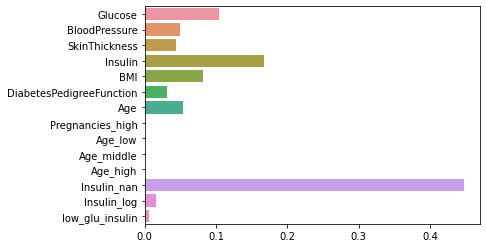

In [135]:
sns.barplot(x=model.feature_importances_, y=feature_names)

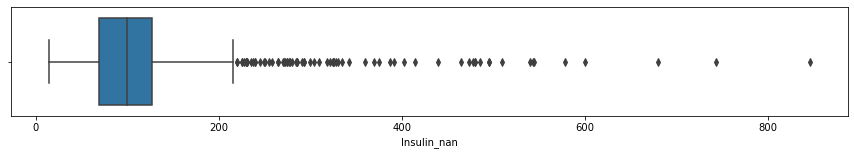

In [136]:
plt.figure(figsize=(15, 2))
sns.boxplot(df["Insulin_nan"])

In [137]:
df["Insulin_nan"].describe()

count    768.000000
mean     118.933073
std       93.574371
min       14.000000
25%       68.700000
50%      100.000000
75%      127.250000
max      846.000000
Name: Insulin_nan, dtype: float64

In [138]:
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

58.55

In [139]:
OUT = IQR3 + (IQR * 1.5)
OUT

215.075

In [140]:
df[df["Insulin_nan"] > OUT].shape

(72, 16)

In [141]:
train = df[df["Insulin_nan"] > 600].shape

In [142]:
### Training

model = DecisionTreeClassifier()
train = df[:split_count].copy()
test = df[split_count:].copy()
X_train = train[feature_names]
X_test = test[feature_names]
y_train = train[label_name]
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [143]:
### Quantitative Result

diff_count = abs(y_test - y_predict).sum()
print(diff_count)
(len(y_test) - diff_count) / len(y_test) * 100

19


87.66233766233766

In [144]:
### Scaling


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Glucose", "DiabetesPedigreeFunction"]])
scale = scaler.transform(df[["Glucose", "DiabetesPedigreeFunction"]])
scale


array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [145]:
df[["Glucose", "DiabetesPedigreeFunction"]] = scale
df[["Glucose", "DiabetesPedigreeFunction"]].head()

Glucose  DiabetesPedigreeFunction
0  0.848324                  0.468492
1 -1.123396                 -0.365061
2  1.943724                  0.604397
3 -0.998208                 -0.920763
4  0.504055                  5.484909

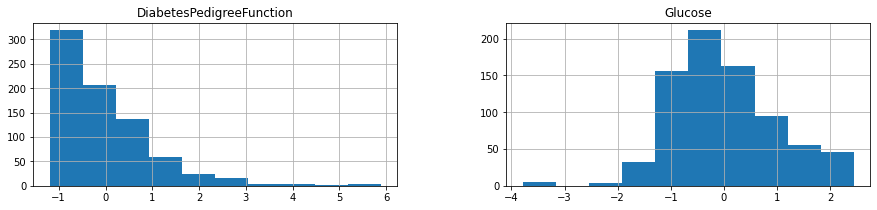

In [146]:
h = df[["Glucose", "DiabetesPedigreeFunction"]].hist(figsize=(15, 3))

In [147]:
## save the pre-processed data as csv file

df.to_csv("data/diabetes_feature.csv", index=False)

In [148]:
pd.read_csv("data/diabetes_feature.csv").head()

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6  0.848324             72             35        0  33.6   
1            1 -1.123396             66             29        0  26.6   
2            8  1.943724             64              0        0  23.3   
3            1 -0.998208             66             23       94  28.1   
4            0  0.504055             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Pregnancies_high  Age_low  \
0                  0.468492   50        1             False    False   
1                 -0.365061   31        0             False    False   
2                  0.604397   32        1              True    False   
3                 -0.920763   21        0             False     True   
4                  5.484909   33        1             False    False   

   Age_middle  Age_high  Insulin_nan  Insulin_log  low_glu_insulin  
0        True     False        100.3     4.618086            False  
1        True     False         68.7     4.244200             True  
2        True     False        100.3     4.618086            False  
3       False     False         94.0     4.553877             True  
4        True     False        168.0     5.129899            False

In [149]:
df.shape


(768, 16)

In [150]:
df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6  0.848324             72             35        0  33.6   
1            1 -1.123396             66             29        0  26.6   
2            8  1.943724             64              0        0  23.3   
3            1 -0.998208             66             23       94  28.1   
4            0  0.504055             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Pregnancies_high  Age_low  \
0                  0.468492   50        1             False    False   
1                 -0.365061   31        0             False    False   
2                  0.604397   32        1              True    False   
3                 -0.920763   21        0             False     True   
4                  5.484909   33        1             False    False   

   Age_middle  Age_high  Insulin_nan  Insulin_log  low_glu_insulin  
0        True     False        100.3     4.618086            False  
1        True     False         68.7     4.244200             True  
2        True     False        100.3     4.618086            False  
3       False     False         94.0     4.553877             True  
4        True     False        168.0     5.129899            False

In [169]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age','Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan',
       'low_glu_insulin']]
y = df['Outcome']

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
X_train.shape

(614, 12)

In [172]:
y_train.shape

(614,)

In [173]:
X_test.head()

Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  \
668 -0.716533             58             33  34.0                 -0.126471   
324 -0.278373             75             32  35.7                 -0.978145   
624 -0.403562             64              0  30.8                 -0.947944   
690 -0.434859             80              0  24.6                  1.160099   
473  0.472758             90              0  29.9                 -0.790898   

     Age  Pregnancies_high  Age_low  Age_middle  Age_high  Insulin_nan  \
668   43             False    False        True     False        190.0   
324   21             False     True       False     False         68.7   
624   21             False     True       False     False         68.7   
690   34              True    False        True     False         68.7   
473   50              True    False        True     False         68.7   

     low_glu_insulin  
668            False  
324            False  
624            False  
690            False  
473            False

In [174]:
y_test.head()

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

In [175]:
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [176]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [177]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [178]:
abs(y_predict-y_test).sum()

24

In [179]:
from sklearn.metrics import accuracy_score
 
accuracy_score(y_test, y_predict) * 100

84.4155844155844

In [180]:
feature_names = X_train.columns.tolist()


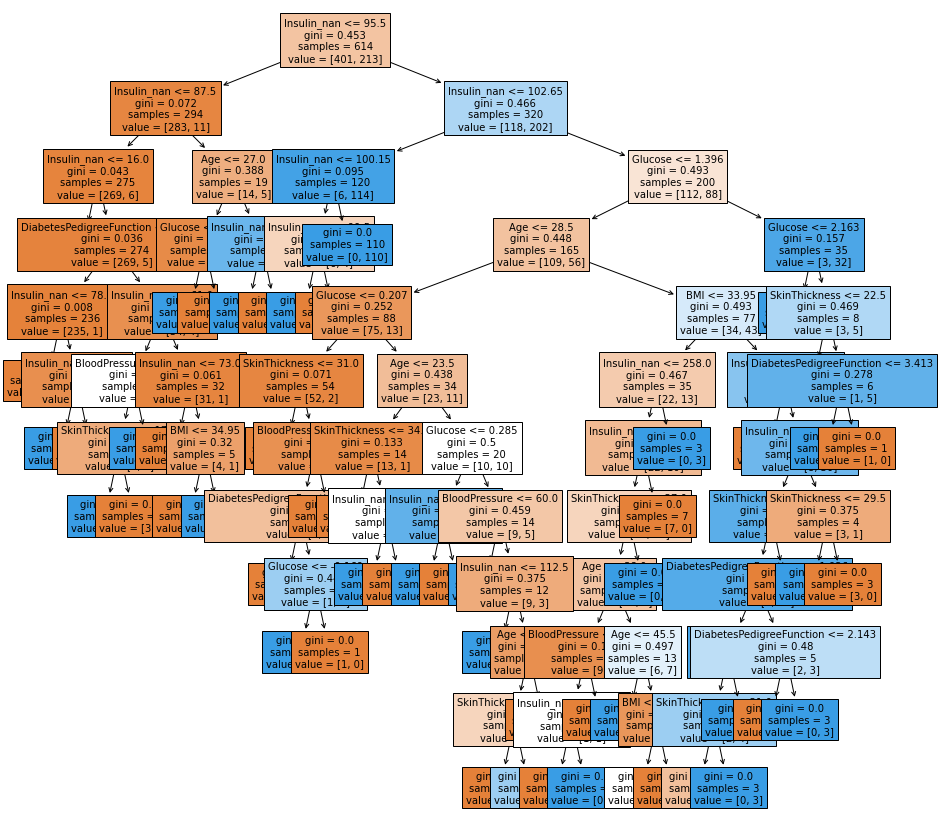

In [181]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [182]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [185]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print('depth:',max_depth, '| Score:', score)

depth: 3 | Score: 85.06493506493507
depth: 4 | Score: 87.01298701298701
depth: 5 | Score: 85.06493506493507
depth: 6 | Score: 85.71428571428571
depth: 7 | Score: 85.71428571428571
depth: 8 | Score: 83.76623376623377
depth: 9 | Score: 85.71428571428571
depth: 10 | Score: 84.4155844155844
depth: 11 | Score: 84.4155844155844


In [186]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12),
"max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    3.6s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [187]:
clf.best_params_

{'max_depth': 4, 'max_features': 0.9}

In [188]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=0.9, random_state=42)

In [189]:
clf.best_score_

0.8843662534986005

In [190]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8        0.008176      0.002476         0.003392        0.000489   
12       0.008126      0.001432         0.003391        0.001017   
16       0.007291      0.002212         0.003391        0.001353   
37       0.009670      0.002919         0.003989        0.000892   
28       0.008976      0.001784         0.005187        0.002555   

   param_max_depth param_max_features                                  params  \
8                4                0.9   {'max_depth': 4, 'max_features': 0.9}   
12               5                0.7   {'max_depth': 5, 'max_features': 0.7}   
16               6                0.5   {'max_depth': 6, 'max_features': 0.5}   
37              10                0.7  {'max_depth': 10, 'max_features': 0.7}   
28               8                0.9   {'max_depth': 8, 'max_features': 0.9}   

    split0_test_score  split1_test_score  split2_test_score  \
8            0.869919           0.943089           0.845528   
12           0.853659           0.902439           0.869919   
16           0.861789           0.910569           0.837398   
37           0.845528           0.918699           0.804878   
28           0.845528           0.926829           0.845528   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
8            0.878049           0.885246         0.884366        0.032268   
12           0.869919           0.901639         0.879515        0.019327   
16           0.894309           0.893443         0.879502        0.026326   
37           0.918699           0.893443         0.876250        0.044581   
28           0.894309           0.868852         0.876210        0.031070   

    rank_test_score  
8                 1  
12                2  
16                3  
37                4  
28                5

In [191]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [192]:
clf.score(X_test, y_test)

0.8831168831168831

In [194]:
max_depth = np.random.randint(3, 20, 10)
max_depth
 
max_features = np.random.uniform(0.7, 1.0, 100)
 
param_distributions = {"max_depth" :max_depth,
           "max_features": max_features,
           "min_samples_split" : list(range(2, 7))
           }
param_distributions

{'max_depth': array([17,  9,  3, 13, 14,  6,  6, 19, 12, 11]),
 'max_features': array([0.80618983, 0.78811634, 0.88212193, 0.80428612, 0.97560888,
        0.90685752, 0.80998903, 0.87726695, 0.96890452, 0.93877681,
        0.89714983, 0.78943614, 0.89490395, 0.75581185, 0.89096225,
        0.77165539, 0.81331921, 0.71679817, 0.78259902, 0.81826276,
        0.95594067, 0.72164386, 0.93148829, 0.92332573, 0.72972184,
        0.87408184, 0.95988975, 0.78432082, 0.78608077, 0.79930358,
        0.98176247, 0.77379792, 0.82514138, 0.76595608, 0.87416236,
        0.70014409, 0.75305625, 0.93526913, 0.78480366, 0.77311944,
        0.90663984, 0.9096058 , 0.88188371, 0.77012844, 0.97632286,
        0.89074787, 0.87413113, 0.89770557, 0.94995358, 0.89188054,
        0.82682849, 0.9406893 , 0.86469945, 0.75723596, 0.81062205,
        0.96017705, 0.84349133, 0.81494518, 0.99031907, 0.94016113,
        0.97245607, 0.95904331, 0.76119717, 0.7631396 , 0.99435718,
        0.76904473, 0.82830996, 0.867

In [195]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
    param_distributions,
    n_iter=1000,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    random_state=42
    )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([17,  9,  3, 13, 14,  6,  6, 19, 12, 11]),
                                        'max_features': array([0.80618983, 0.78811634, 0.88212193, 0.80428612, 0.97560888,
       0.90685752, 0.80998903, 0.87726695, 0.96890452, 0.93877681,
       0.89714983, 0.78943614, 0.89490395, 0.75581185, 0.89096225...
       0.85304213, 0.7152557 , 0.93026868, 0.71905946, 0.72505779,
       0.70481971, 0.82949618, 0.94150975, 0.84376379, 0.83108509,
       0.91053095, 0.88866728, 0.93264833, 0.77901073, 0.77304793,
       0.82404033, 0.74278421, 0.78337816, 0.7517256 , 0.93538323,
       0.88927986, 0.85925477, 0.78658449, 0.98975225, 0.98318914,
       0.7070178 , 0.97623656, 0.94902441, 0.98268169, 0.727536  ]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, s

In [196]:
clf.best_params_

{'min_samples_split': 6, 'max_features': 0.9387768073840616, 'max_depth': 6}

In [197]:
clf.best_score_

0.8892976142876183

In [198]:
clf.score(X_test, y_test)

0.8701298701298701

In [199]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
84        0.005385      0.000489         0.002394        0.000488   
226       0.010987      0.007283         0.002200        0.000412   
788       0.005385      0.000488         0.002195        0.000399   
959       0.012901      0.013586         0.003096        0.001202   
568       0.006781      0.000746         0.002394        0.000488   

    param_min_samples_split param_max_features param_max_depth  \
84                        6           0.975609               6   
226                       6           0.935269               6   
788                       6           0.940689               6   
959                       6           0.976237               6   
568                       6           0.931488               6   

                                                params  split0_test_score  \
84   {'min_samples_split': 6, 'max_features': 0.975...           0.861789   
226  {'min_samples_split': 6, 'max_features': 0.935...           0.861789   
788  {'min_samples_split': 6, 'max_features': 0.940...           0.861789   
959  {'min_samples_split': 6, 'max_features': 0.976...           0.861789   
568  {'min_samples_split': 6, 'max_features': 0.931...           0.861789   

     split1_test_score  split2_test_score  split3_test_score  \
84            0.926829           0.861789           0.878049   
226           0.926829           0.861789           0.878049   
788           0.926829           0.861789           0.878049   
959           0.926829           0.861789           0.878049   
568           0.926829           0.861789           0.878049   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
84            0.918033         0.889298        0.027837                1  
226           0.918033         0.889298        0.027837                1  
788           0.918033         0.889298        0.027837                1  
959           0.918033         0.889298        0.027837                1  
568           0.918033         0.889298        0.027837                1

In [200]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [201]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [202]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [203]:
(y_predict != y_test).sum()

23

In [204]:
accuracy_score(y_test, y_predict)

0.8506493506493507

In [205]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [206]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [207]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [208]:
(y_predict != y_test).sum()

18

In [210]:
accuracy_score(y_test, y_predict)

0.8831168831168831

In [211]:
model.feature_importances_

array([1.25254822e-01, 7.97119202e-03, 1.78244209e-02, 3.09455566e-02,
       2.59793312e-02, 8.09434718e-02, 1.90851307e-03, 6.64428745e-03,
       3.53470549e-03, 0.00000000e+00, 6.98965617e-01, 2.80829633e-05])

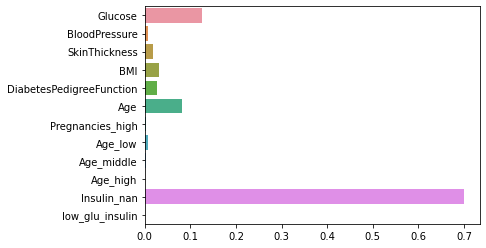

In [212]:
feature_names = X_train.columns.tolist()
 
sns.barplot(x=model.feature_importances_, y=feature_names)

In [219]:
from sklearn.model_selection import RandomizedSearchCV

estimator = DecisionTreeClassifier(random_state=42)

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth,
"max_features": max_features}
 
clf = RandomizedSearchCV(estimator,
param_distributions,
n_iter=100,
scoring="accuracy",
n_jobs=-1,
cv=5,
verbose=2
)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 427 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.9s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([14, 18,  6,  5, 12,  6,  3, 17, 18, 11]),
                                        'max_features': array([0.91559315, 0.5638944 , 0.66217805, 0.57026   , 0.96339165,
       0.85814447, 0.56770097, 0.33341642, 0.87104691, 0.89181223])},
                   scoring='accuracy', verbose=2)

In [221]:
clf.param_distributions

{'max_depth': array([14, 18,  6,  5, 12,  6,  3, 17, 18, 11]),
 'max_features': array([0.91559315, 0.5638944 , 0.66217805, 0.57026   , 0.96339165,
        0.85814447, 0.56770097, 0.33341642, 0.87104691, 0.89181223])}

In [222]:
clf.best_score_

0.8860189257630282

In [223]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
RandomForestClassifier(random_state=42),
GradientBoostingClassifier(random_state=42)
]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [225]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
results


[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [226]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)
        
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=2
                      )

    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   24.3s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   48.9s finished


In [227]:
df = pd.DataFrame(results, 
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
df

estimator  \
0      DecisionTreeClassifier   
1      RandomForestClassifier   
2  GradientBoostingClassifier   

                                         best_params  train_score  test_score  \
0  {'max_features': 0.8171272711691042, 'max_dept...     0.889244    0.870130   
1  {'n_estimators': 146, 'max_features': 0.827374...     0.899054    0.883117   
2  {'n_estimators': 171, 'max_features': 0.837810...     0.899040    0.883117   

                                           cv_result  
0  {'mean_fit_time': [0.008178043365478515, 0.007...  
1  {'mean_fit_time': [0.3807807922363281, 0.27007...  
2  {'mean_fit_time': [1.3635528564453125, 1.02346...

In [228]:
pd.DataFrame(df.loc[1, "cv_result"]).sort_values(by="rank_test_score")


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
22       0.364425      0.010863         0.022141        0.004943   
88       0.403720      0.052832         0.019348        0.000489   
14       0.292618      0.009723         0.017154        0.001716   
39       0.295211      0.002750         0.016356        0.000489   
66       0.368414      0.023513         0.020146        0.001595   
..            ...           ...              ...             ...   
87       0.312166      0.040403         0.017553        0.001739   
33       0.340090      0.037381         0.018152        0.001716   
95       0.296208      0.019163         0.020545        0.003919   
30       0.252724      0.010529         0.017354        0.002863   
29       0.391353      0.013013         0.025332        0.001017   

   param_n_estimators param_max_features param_max_depth  \
22                146           0.827374               5   
88                146           0.817127               5   
14                116           0.507787              16   
39                119           0.507787              15   
66                146           0.507742               9   
..                ...                ...             ...   
87                128           0.756809               2   
33                128           0.827374               2   
95                128            0.83781               2   
30                117           0.400895               2   
29                189           0.382612               2   

                                               params  split0_test_score  \
22  {'n_estimators': 146, 'max_features': 0.827374...           0.861789   
88  {'n_estimators': 146, 'max_features': 0.817127...           0.861789   
14  {'n_estimators': 116, 'max_features': 0.507787...           0.861789   
39  {'n_estimators': 119, 'max_features': 0.507787...           0.861789   
66  {'n_estimators': 146, 'max_features': 0.507742...           0.869919   
..                                                ...                ...   
87  {'n_estimators': 128, 'max_features': 0.756808...           0.829268   
33  {'n_estimators': 128, 'max_features': 0.827374...           0.829268   
95  {'n_estimators': 128, 'max_features': 0.837810...           0.845528   
30  {'n_estimators': 117, 'max_features': 0.400895...           0.837398   
29  {'n_estimators': 189, 'max_features': 0.382612...           0.829268   

    split1_test_score  split2_test_score  split3_test_score  \
22           0.943089           0.869919           0.902439   
88           0.943089           0.869919           0.902439   
14           0.951220           0.869919           0.902439   
39           0.951220           0.869919           0.902439   
66           0.951220           0.869919           0.894309   
..                ...                ...                ...   
87           0.943089           0.861789           0.853659   
33           0.943089           0.861789           0.853659   
95           0.934959           0.837398           0.878049   
30           0.918699           0.861789           0.861789   
29           0.910569           0.869919           0.853659   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
22           0.918033         0.899054        0.030161                1  
88           0.918033         0.899054        0.030161                1  
14           0.909836         0.899040        0.031895                3  
39           0.909836         0.899040        0.031895                3  
66           0.909836         0.899040        0.030192                3  
..                ...              ...             ...              ...  
87           0.901639         0.877889        0.040064               96  
33           0.901639         0.877889        0.040064               96  
95           0.893443         0.877876        0.035173               98  
30           0.877049         0.871345        0.026870  